In [0]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
url='http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz'
df = pd.read_csv(url)
# df.head(4)

In [0]:
df.columns = [
'duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'outcome'
]
# df[0:5]

In [0]:
df.shape

(494020, 42)

In [0]:
df.outcome.unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [0]:
df.groupby('outcome')['outcome'].count()

outcome
back.                 2203
buffer_overflow.        30
ftp_write.               8
guess_passwd.           53
imap.                   12
ipsweep.              1247
land.                   21
loadmodule.              9
multihop.                7
neptune.            107201
nmap.                  231
normal.              97277
perl.                    3
phf.                     4
pod.                   264
portsweep.            1040
rootkit.                10
satan.                1589
smurf.              280790
spy.                     2
teardrop.              979
warezclient.          1020
warezmaster.            20
Name: outcome, dtype: int64

In [0]:
# probe={"ipsweep.","portsweep.","nmap.","satan."} 
# r2l={"ftp_write.", "guess_passwd.","imap.","multihop.","phf.","spy.", "warezclient.","warezmaster."}
# u2r={"buffer_overflow.","loadmodule.","perl.", "rootkit."} 
# dos={"back.", "land." ," "neptune.", "pod.","smurf.","teardrop."} (Total=6)
# normal = {"normal" }

In [0]:
sns.boxplot(df.outcome)

In [0]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.0,494020.0,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685232e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,0.000111,0.000036,0.011352,0.001083,0.000109,0.001008,0.0,0.0,0.001387,332.286347,292.907133,0.176687,0.176609,0.057434,0.057719,0.791547,0.020982,0.028997,232.471230,188.666034,0.753779,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,0.010551,0.007793,2.012720,0.096416,0.011020,0.036482,0.0,0.0,0.037211,213.147129,246.322733,0.380717,0.381017,0.231624,0.232147,0.388190,0.082206,0.142398,64.744665,106.040236,0.410781,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,117.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,510.000000,510.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,1.000000,2.000000,993.000000,28.000000,2.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [0]:
import pandas_profiling

pandas_profiling.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,42
Number of observations,494020
Total Missing (%),0.0%
Total size in memory,158.3 MiB
Average record size in memory,336.0 B
Numeric,22
Categorical,4
Boolean,4
Date,0
Text (Unique),0
Rejected,12


In [0]:
probe={"ipsweep.","portsweep.","nmap.","satan."} 
r2l={"ftp_write.", "guess_passwd.","imap.","multihop.","phf.","spy.", "warezclient.","warezmaster."} 
u2r={"buffer_overflow.","loadmodule.","perl.", "rootkit."} 
dos={"back.", "land." ,"neptune.", "pod.","smurf.","teardrop."}
normal = {"normal" }


In [0]:
df = df.replace(to_replace=["ipsweep.","portsweep.","nmap.","satan."], value='probe')
df=df.replace(to_replace=["ftp_write.", "guess_passwd.","imap.","multihop.","phf.","spy.", "warezclient.","warezmaster."], value='r2l')
df=df.replace(to_replace=["buffer_overflow.","loadmodule.","perl.", "rootkit."], value='u2r')
df=df.replace(to_replace=["back.", "land." ,"neptune.", "pod.","smurf.","teardrop."], value='dos')

In [0]:
df.outcome.unique()

array(['normal.', 'u2r', 'dos', 'r2l', 'probe'], dtype=object)

In [0]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

label_encoder = preprocessing.LabelEncoder() 

df['outcome']= label_encoder.fit_transform(df['outcome']) 
df['protocol_type']= label_encoder.fit_transform(df['protocol_type']) 
df['service']= label_encoder.fit_transform(df['service']) 
df['flag']= label_encoder.fit_transform(df['flag']) 

y_labels = df['outcome']
df = df.drop(columns='outcome')

In [0]:
df.describe()

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df, y_labels, test_size = 0.2)


In [0]:
import time

clf=RandomForestClassifier(n_estimators=100)

start = time.time()
clf.fit(x_train,y_train)
stop = time.time()

print("Time taken to train model:", stop-start)

y_pred=clf.predict(x_test)

Time taken to train model: 27.989644765853882


In [0]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 99.97672159021901


In [0]:
from sklearn.externals import joblib 

joblib.dump(clf, 'randomforest.pkl') 


In [0]:
clcc = joblib.load('randomforest.pkl')  
yy = clf.predict(x_test)

print(metrics.accuracy_score(y_test, yy)*100)

Confusion matrix, without normalization
[[78166     0     0     0     0]
 [    1 19590     2     2     0]
 [    0     5   800     0     0]
 [    1     8     0   220     0]
 [    0     4     0     0     5]]
Normalized confusion matrix
[[78166     0     0     0     0]
 [    1 19590     2     2     0]
 [    0     5   800     0     0]
 [    1     8     0   220     0]
 [    0     4     0     0     5]]


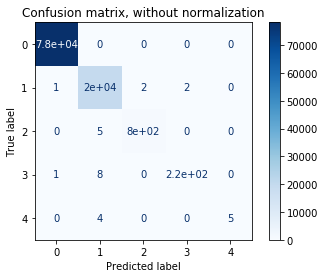

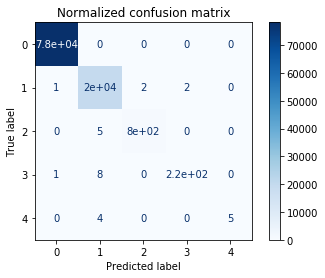

In [0]:
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, x_test, y_test,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

In [0]:
    print(metrics.classification_report(y_test, y_pred))
    

    print(metrics.cohen_kappa_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78166
           1       1.00      1.00      1.00     19595
           2       1.00      0.99      1.00       805
           3       0.99      0.96      0.98       229
           4       1.00      0.56      0.71         9

    accuracy                           1.00     98804
   macro avg       1.00      0.90      0.94     98804
weighted avg       1.00      1.00      1.00     98804

0.9993044644233708
